# Dependency Parsing - Stanza Library
following https://stanfordnlp.github.io/stanza/depparse.html

In [2]:
pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 574 kB 13.6 MB/s 
     |████████████████████████████████| 4.2 MB 72.2 MB/s 
     |████████████████████████████████| 175 kB 72.6 MB/s 
     |████████████████████████████████| 86 kB 7.1 MB/s 
     |████████████████████████████████| 6.6 MB 52.2 MB/s 
     |████████████████████████████████| 596 kB 45.1 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=851e61232ae8ddfd5df1bd702fc6b3527a83626aadcd9f5cd18ca17d07c9df3a
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
import stanza

In [21]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos,lemma,depparse')

2022-06-12 13:51:58 WARNING: Can not find mwt: default from official model list. Ignoring it.
2022-06-12 13:51:59 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |
| depparse  | combined |

2022-06-12 13:51:59 INFO: Use device: cpu
2022-06-12 13:51:59 INFO: Loading: tokenize
2022-06-12 13:51:59 INFO: Loading: pos
2022-06-12 13:51:59 INFO: Loading: lemma
2022-06-12 13:51:59 INFO: Loading: depparse
2022-06-12 13:51:59 INFO: Done loading processors!


In [5]:
doc = nlp('Hybrid Cloud adoption for internal and external services designed to maximize the energy efficiency and renewable sources (up to 100%)')

In [6]:
print(*[f'id: {word.id}\tword: {word.text}\thead id: {word.head}\thead: {sent.words[word.head-1].text if word.head > 0 else "root"}\tdeprel: {word.deprel}' for sent in doc.sentences for word in sent.words], sep='\n')


id: 1	word: Hybrid	head id: 3	head: adoption	deprel: amod
id: 2	word: Cloud	head id: 3	head: adoption	deprel: compound
id: 3	word: adoption	head id: 0	head: root	deprel: root
id: 4	word: for	head id: 8	head: services	deprel: case
id: 5	word: internal	head id: 8	head: services	deprel: amod
id: 6	word: and	head id: 7	head: external	deprel: cc
id: 7	word: external	head id: 5	head: internal	deprel: conj
id: 8	word: services	head id: 3	head: adoption	deprel: nmod
id: 9	word: designed	head id: 8	head: services	deprel: acl
id: 10	word: to	head id: 11	head: maximize	deprel: mark
id: 11	word: maximize	head id: 9	head: designed	deprel: advcl
id: 12	word: the	head id: 14	head: efficiency	deprel: det
id: 13	word: energy	head id: 14	head: efficiency	deprel: compound
id: 14	word: efficiency	head id: 11	head: maximize	deprel: obj
id: 15	word: and	head id: 17	head: sources	deprel: cc
id: 16	word: renewable	head id: 17	head: sources	deprel: amod
id: 17	word: sources	head id: 14	head: efficiency	deprel:

In [22]:
doc = nlp('Aim to provide at least CHF 300 bn of sustainable finance by 2030')

In [23]:
print(*[f'id: {word.id}\tword: {word.text}\thead id: {word.head}\thead: {sent.words[word.head-1].text if word.head > 0 else "root"}\tdeprel: {word.deprel}' for sent in doc.sentences for word in sent.words], sep='\n')


id: 1	word: Aim	head id: 0	head: root	deprel: root
id: 2	word: to	head id: 3	head: provide	deprel: mark
id: 3	word: provide	head id: 1	head: Aim	deprel: acl
id: 4	word: at	head id: 5	head: least	deprel: case
id: 5	word: least	head id: 6	head: CHF	deprel: nmod
id: 6	word: CHF	head id: 8	head: bn	deprel: compound
id: 7	word: 300	head id: 6	head: CHF	deprel: nummod
id: 8	word: bn	head id: 3	head: provide	deprel: obj
id: 9	word: of	head id: 11	head: finance	deprel: case
id: 10	word: sustainable	head id: 11	head: finance	deprel: amod
id: 11	word: finance	head id: 8	head: bn	deprel: nmod
id: 12	word: by	head id: 13	head: 2030	deprel: case
id: 13	word: 2030	head id: 3	head: provide	deprel: obl


# Dependency Parsing - Spacy-Displacy Version

In [15]:
# copied from https://towardsdatascience.com/natural-language-processing-dependency-parsing-cf094bbbe3f7


import spacy
from spacy import displacy

# Load the language model
nlp = spacy.load("en_core_web_sm")

sentence = "Hybrid Cloud adoption for internal and external services designed to maximize the energy efficiency and renewable sources (up to 100%)"
#sentence = 'Deemed universities charge huge fees'

# nlp function returns an object with individual token information, 
# linguistic features and relationships
doc = nlp(sentence)

print ("{:<15} | {:<8} | {:<15} | {:<20}".format('Token','Relation','Head', 'Children'))
print ("-" * 70)

for token in doc:
  # Print the token, dependency nature, head and all dependents of the token
  print ("{:<15} | {:<8} | {:<15} | {:<20}"
         .format(str(token.text), str(token.dep_), str(token.head.text), str([child for child in token.children])))
  
# Use displayCy to visualize the dependency 
# displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

Token           | Relation | Head            | Children            
----------------------------------------------------------------------
Hybrid          | compound | Cloud           | []                  
Cloud           | compound | adoption        | [Hybrid]            
adoption        | ROOT     | adoption        | [Cloud, for, (, %, )]
for             | prep     | adoption        | [services]          
internal        | amod     | services        | [and, external]     
and             | cc       | internal        | []                  
external        | conj     | internal        | []                  
services        | pobj     | for             | [internal, designed]
designed        | acl      | services        | [maximize]          
to              | aux      | maximize        | []                  
maximize        | xcomp    | designed        | [to, efficiency]    
the             | det      | efficiency      | []                  
energy          | compound | efficiency     

In [16]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

In [25]:
nlp = spacy.load("en_core_web_sm")

sentence = "Aim to provide at least CHF 300 bn of sustainable finance by 2030"
#sentence = "Hybrid Cloud adoption for internal and external services designed to maximize the energy efficiency and renewable sources (up to 100%)"
#sentence = 'Deemed universities charge huge fees'

# nlp function returns an object with individual token information, 
# linguistic features and relationships
doc = nlp(sentence)

print ("{:<15} | {:<8} | {:<15} | {:<20}".format('Token','Relation','Head', 'Children'))
print ("-" * 70)

for token in doc:
  # Print the token, dependency nature, head and all dependents of the token
  print ("{:<15} | {:<8} | {:<15} | {:<20}"
         .format(str(token.text), str(token.dep_), str(token.head.text), str([child for child in token.children])))

Token           | Relation | Head            | Children            
----------------------------------------------------------------------
Aim             | ROOT     | Aim             | [provide]           
to              | aux      | provide         | []                  
provide         | xcomp    | Aim             | [to, CHF, by]       
at              | advmod   | least           | []                  
least           | advmod   | CHF             | [at]                
CHF             | dobj     | provide         | [least, bn]         
300             | nummod   | bn              | []                  
bn              | appos    | CHF             | [300, of]           
of              | prep     | bn              | [finance]           
sustainable     | amod     | finance         | []                  
finance         | pobj     | of              | [sustainable]       
by              | prep     | provide         | [2030]              
2030            | pobj     | by              

In [26]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

# Combining Dependency Parsing & Network Graphs

In [ ]:
# https://towardsdatascience.com/how-to-find-shortest-dependency-path-with-spacy-and-stanfordnlp-539d45d28239 

import spacy
import networkx as nx
nlp = spacy.load("en_core_web_sm")

In [ ]:
# tryout with another example

In [ ]:
doc = nlp(u"Aim to provide at least CHF 300 bn of sustainable finance by 2030")
#doc = nlp(u"The country is football-mad, but all that enthusiasm simply can't compensate for the struggling economy.")
#doc = nlp(u"Hybrid Cloud adoption for internal and external services designed to maximize the energy efficiency and renewable sources (up to 100%)")

print('sentence:'.format(doc))
# Load spacy's dependency tree into a networkx graph
edges = []
for token in doc:
    for child in token.children:
        edges.append(('{0}'.format(token.lower_),
                      '{0}'.format(child.lower_)))
graph = nx.Graph(edges)
# Get the length and path
entity1 = 'sustainable'#.lower()
entity2 = '300'
print(nx.shortest_path_length(graph, source=entity1, target=entity2))
print(nx.shortest_path(graph, source=entity1, target=entity2))

sentence:
4
['sustainable', 'finance', 'of', 'bn', '300']


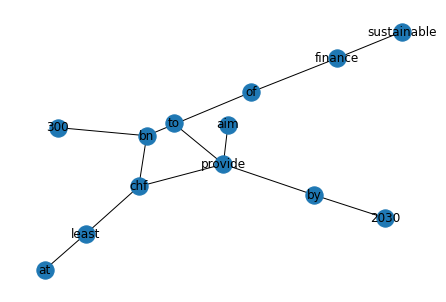

In [ ]:
nx.draw(graph, with_labels = True)